<a href="https://colab.research.google.com/github/Jesvin-K-Justin/sample/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical insurance costs prediction using linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

##Preprocessing

In [ ]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['sex']=df['sex'].map({'female':0,'male':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Label Encoding


In [ ]:

label_encoder = preprocessing.LabelEncoder()

df['region']= label_encoder.fit_transform(df['region'])

df['region'].unique()

array([3, 2, 1, 0])

In [ ]:
scaler=StandardScaler()
scaled_df = scaler.fit_transform(df[['bmi','age','children']])
scaled_df = pd.DataFrame(scaled_df, columns=['bmi','age','children'])
scaled_df.head()

,bmi,age,children
0,-0.453320,-1.438764,-0.908614
1,0.509621,-1.509965,-0.078767
2,0.383307,-0.797954,1.580926
3,-1.305531,-0.441948,-0.908614
4,-0.292556,-0.513149,-0.908614


In [ ]:
df.drop(['bmi','age','children'],axis=1,inplace=True)
df.head()

,sex,smoker,region,charges
0,0,1,3,16884.92400
1,1,0,2,1725.55230
2,1,0,2,4449.46200
3,1,0,1,21984.47061
4,1,0,1,3866.85520


In [ ]:
df=pd.concat([df, scaled_df],axis=1)
df.head()

,sex,smoker,region,charges,bmi,age,children
0,0,1,3,16884.92400,-0.453320,-1.438764,-0.908614
1,1,0,2,1725.55230,0.509621,-1.509965,-0.078767
2,1,0,2,4449.46200,0.383307,-0.797954,1.580926
3,1,0,1,21984.47061,-1.305531,-0.441948,-0.908614
4,1,0,1,3866.85520,-0.292556,-0.513149,-0.908614


In [ ]:
X=df.drop('charges',axis=1)
Y=df['charges']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

    feature       VIF
0       sex  1.566982
1    smoker  1.207526
2    region  1.573703
3       bmi  1.022282
4       age  1.014513
5  children  1.002043


Since VIF is less than 5 there is no multicollinearity

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print("Training Accuracy :",r2_score(Y_train,y_pred_train))
print("Testing Accuracy :",r2_score(Y_test,y_pred_test))


Training Accuracy : 0.7417049283233981
Testing Accuracy : 0.783346310736454


In [ ]:

test_mse = mean_squared_error(Y_test,y_pred_test)
print('Testing Mean Squared Error:', test_mse)

Testing Mean Squared Error: 33635210.43117839


Model has larger amount of error

In [ ]:
import math
rmse=math.sqrt(test_mse)
print("Testing Root Mean Squared Error : ",rmse)

Testing Root Mean Squared Error :  5799.587091438354


Large amount of error. Data points are away from the regression line.

In [ ]:
error_mae = mean_absolute_error(Y_test,y_pred_test)
print("Testing Mean absolute error : ",error_mae)


Testing Mean absolute error :  4186.508898366432


The average absolute error between predicted and actual value is 4186.

In [ ]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2_score(Y_test, y_pred_test)) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adj_r2)


Adjusted R-squared: 0.7783657661556829


In [ ]:
residuals = Y_test - y_pred_test
rss = np.sum(residuals**2)
print("Residual Sum of Squares (RSS):", rss)


Residual Sum of Squares (RSS): 9014236395.555809


In [ ]:
explained_variance = explained_variance_score(Y_test, y_pred_test)
print("Explained Variance Score:", explained_variance)
#gives the quality of prediction. 1 is best

Explained Variance Score: 0.7836717590532514


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:25:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8994.6478    337.767     26.630      0.0

In [ ]:
print(model.params)

const        8994.647793
sex          -131.110580
smoker      23820.434123
region       -353.640017
bmi          2027.316811
age          3613.536151
children      577.660335
dtype: float64


###Feature Ranking

In [ ]:
# Getting the coefficients from the model
coefficients = model.params

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

print(feature_importance)


           Feature   Coefficient
smoker      smoker  23820.434123
const        const   8994.647793
age            age   3613.536151
bmi            bmi   2027.316811
children  children    577.660335
region      region   -353.640017
sex            sex   -131.110580


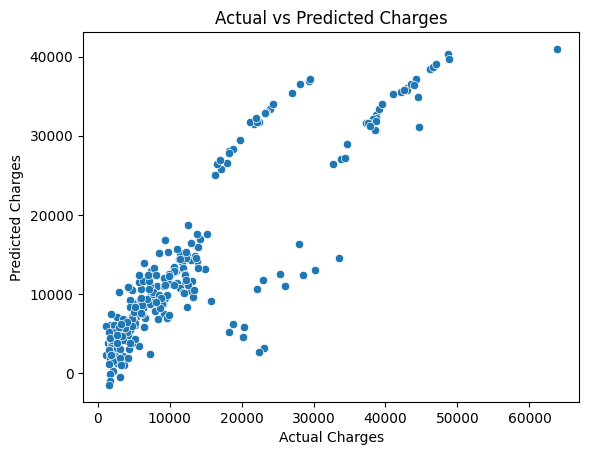

In [ ]:
sns.scatterplot(x=Y_test,y=y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

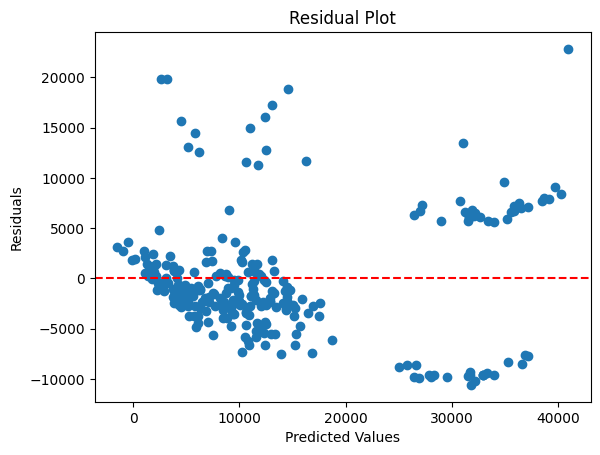

In [ ]:
residuals = Y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
